<a href="https://colab.research.google.com/github/pks98/Pracfiles/blob/main/PowerTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

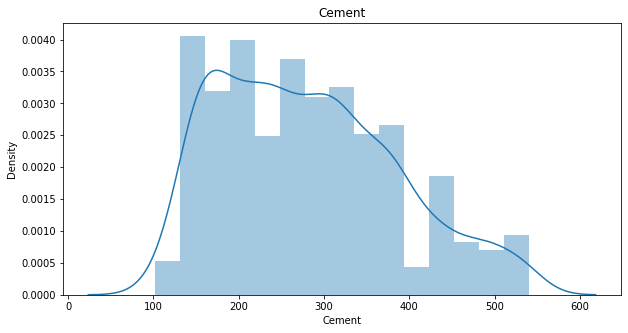

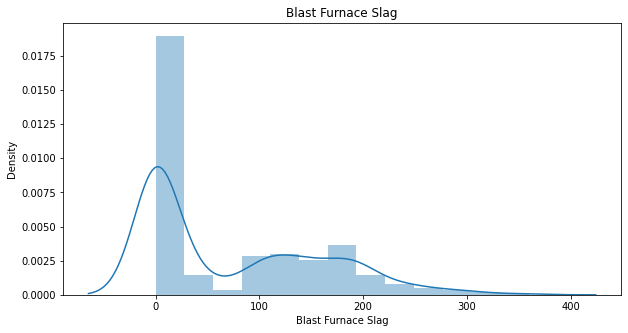

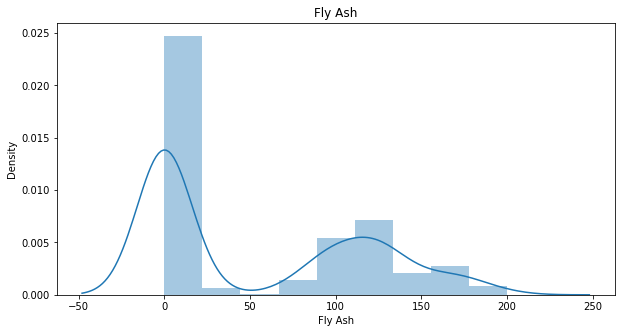

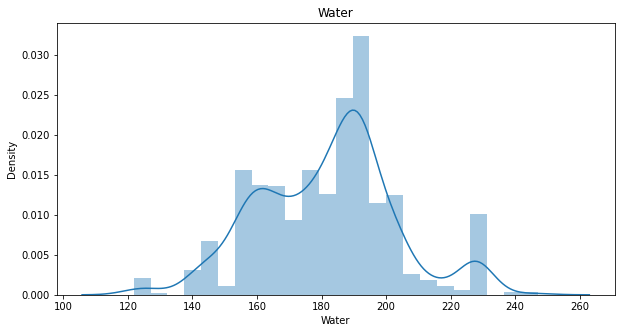

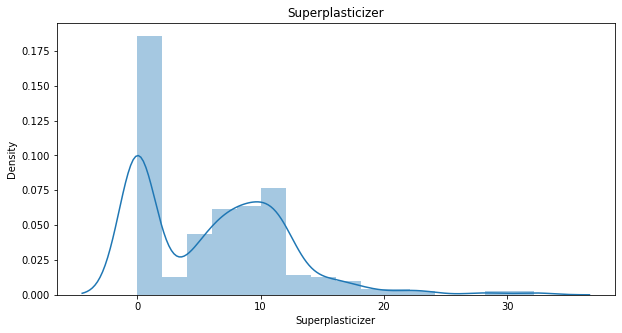

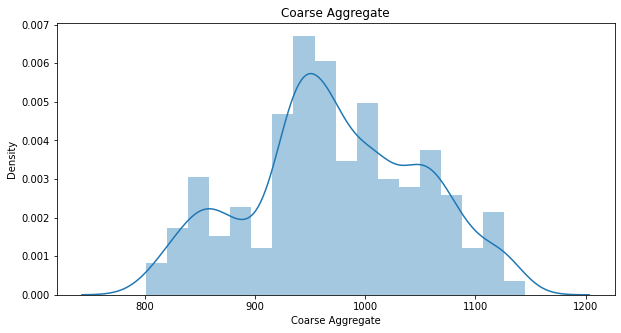

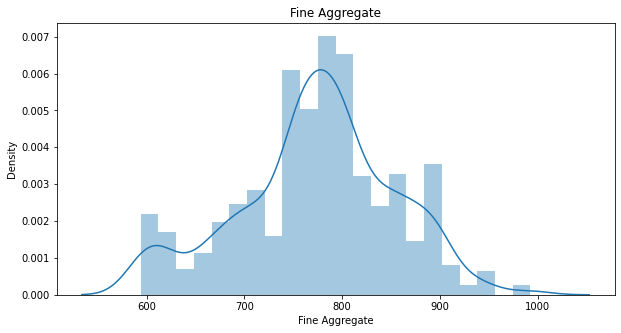

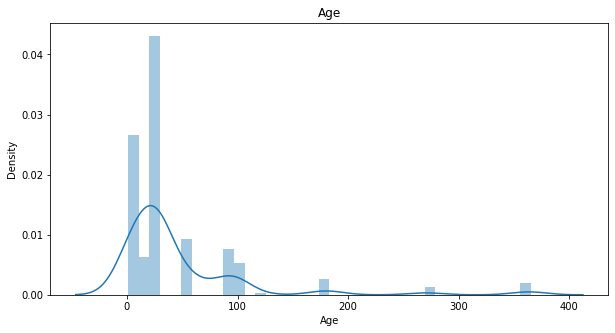

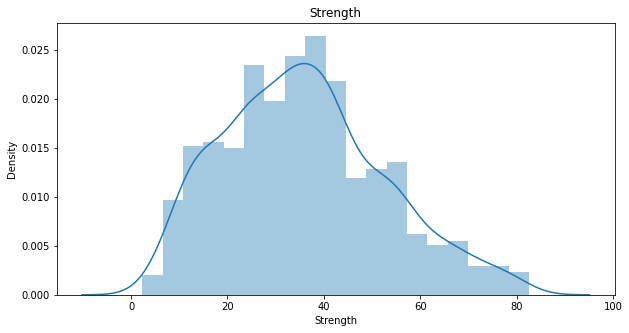

In [6]:
for i in df.columns:
  plt.figure(figsize=(10,5))
  plt.title(i)
  sns.distplot(df[i])

In [7]:
x=df.drop('Strength',axis=1)
y=df['Strength']

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [9]:
x_train.shape,x_test.shape

((824, 8), (206, 8))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()

In [13]:
#The accuracy of the model without tranformation on the column variable

lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('LinearRegression: ',r2_score(y_test,pred))

LinearRegression:  0.6381566268599904


In [21]:
from sklearn.model_selection import cross_val_score

print('LinerRegression :', np.mean(cross_val_score(lr,x,y,scoring='r2',cv=10)))

LinerRegression : 0.27820729160873786


The accuracy of the model decreases in the cross_val_score

In [14]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()
x_train_tranformed=pt.fit_transform(x_train)
x_test_transformed=pt.transform(x_test)

In [17]:
lr.fit(x_train_tranformed,y_train)
pred=lr.predict(x_test_transformed)
print('LinearRegression: ',r2_score(y_test,pred))

LinearRegression:  0.8054711252286116


In [22]:
x_transformed=pt.fit_transform(x)
np.mean(cross_val_score(lr,x_transformed,y,scoring='r2',cv=10))

0.658654862909492

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

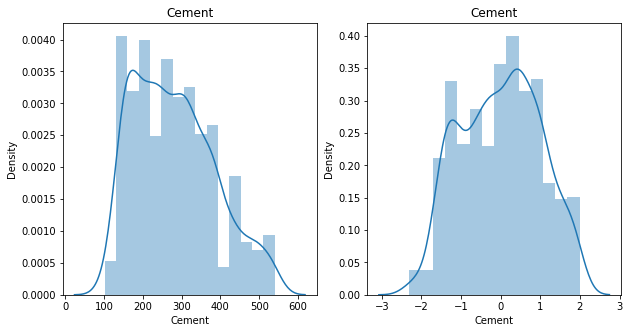

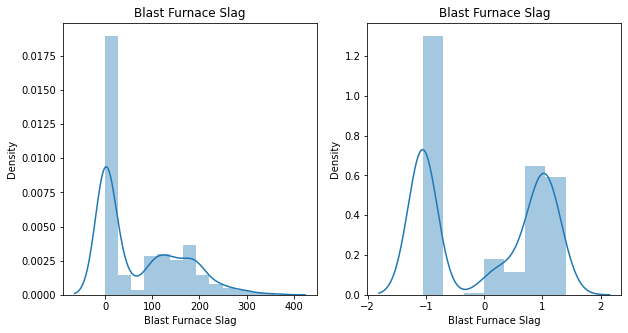

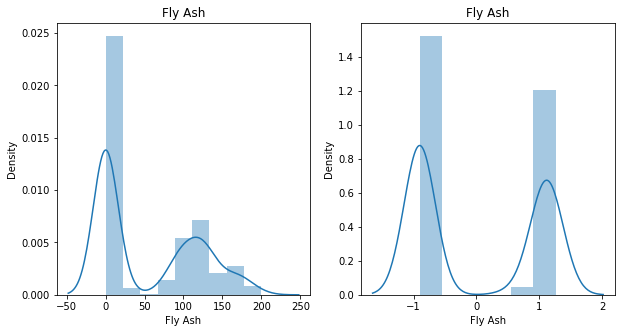

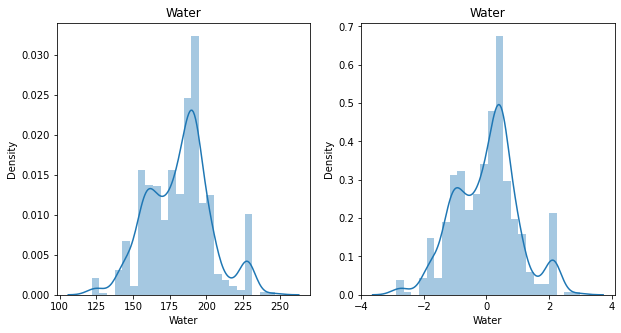

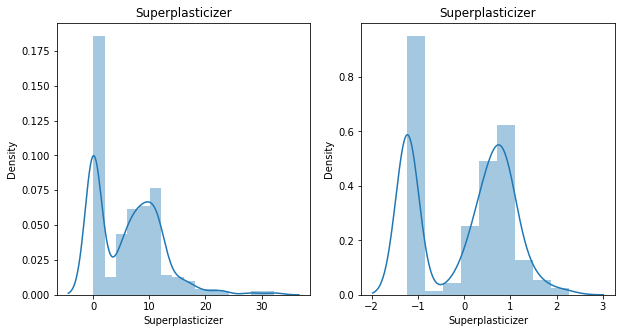

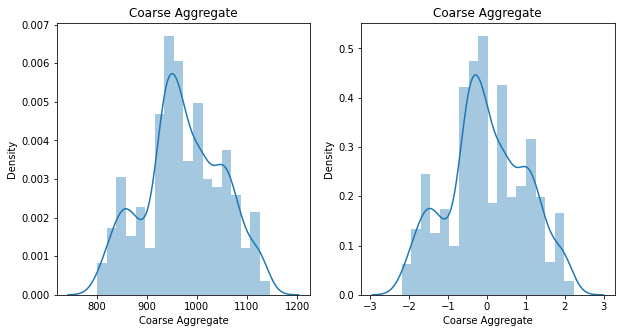

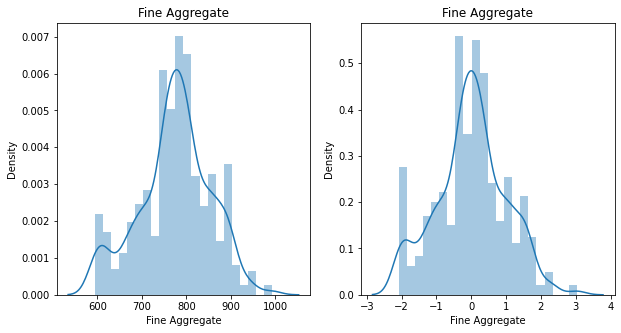

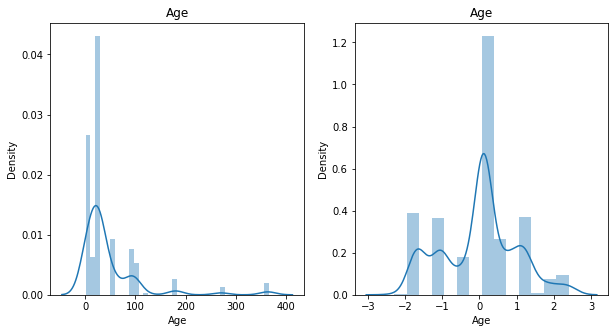

In [27]:
x_transformed=pd.DataFrame(x_transformed,columns=x.columns)

for i in x_transformed:
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  plt.title(i)
  sns.distplot(x[i])

  plt.subplot(122)
  plt.title(i)
  sns.distplot(x_transformed[i])

After applying the tranformation the model has improved the accuracy from 27% to 65%

In [30]:
pt=PowerTransformer(method='box-cox')
x_train_tranformed=pt.fit_transform(x_train+0.000001)
x_test_transformed=pt.transform(x_test+0.000001)

lr.fit(x_train_tranformed,y_train)
pred=lr.predict(x_test_transformed)
print('LinearRegression: ',r2_score(y_test,pred))

x_transformed=pt.fit_transform(x+0.00001)
print('cross_val_score',np.mean(cross_val_score(lr,x_transformed,y,scoring='r2',cv=10)))

LinearRegression:  0.8047416545736874
cross_val_score 0.6473558443973086


By default PowerTransformer applies Yeo-Johnson method for the transformation